In [1]:
%load_ext autoreload
%autoreload 

import os 
import shutil
import numpy as n
from datetime import date
from matplotlib import pyplot as plt
import time
import napari

In [2]:
os.chdir('/home/ali/packages/s2p-lbm/')

from suite3d.job import Job
from suite3d import lbmio, utils, ui
from suite3d.io import get_tif_tag
from suite3d.io import tiff_utils as tfu
from suite3d import file_utils as flu

/home/ali/anaconda3/envs/suite3d-gpu/lib/python3.8/site-packages/paramiko/pkey.py:100: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
/home/ali/anaconda3/envs/suite3d-gpu/lib/python3.8/site-packages/paramiko/transport.py:258: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,


In [3]:
from suite3d import nbtools as nbui

In [4]:
from pathlib import Path

In [5]:
fig_dir = Path('/mnt/md0/s3d-figures')
figname = 'fig3'
fdir = fig_dir / figname
plt.rcParams['svg.fonttype'] = 'none'
os.makedirs(fdir, exist_ok=True)

In [6]:

exp_str = 'TC030_2025-01-27_3-4'
job = Job('/mnt/md0/runs',exp_str, create=False)

   Found and loaded params from /mnt/md0/runs/s3d-TC030_2025-01-27_3-4/params.npy


In [9]:
job.params

{'fs': 3.3333333333333335,
 'tau': 1.3,
 'voxel_size_um': (15, 2.5, 2.5),
 'planes': array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 'convert_plane_ids_to_channel_ids': False,
 'n_ch_tif': 9,
 'skip_roi': None,
 'lbm': False,
 'faced': False,
 'faced_nz': None,
 'multiplane_2p_use_planes': array([1, 2, 3, 4, 5, 6, 7, 8]),
 'notch_filt': None,
 'fix_fastZ': False,
 'num_colors': 1,
 'functional_color_channel': 0,
 'save_dtype': 'float16',
 'n_init_files': 3,
 'init_file_pool': [(0, 6)],
 'init_file_sample_method': 'even',
 'init_n_frames': None,
 'enforce_positivity': True,
 'fix_shallow_plane_shift_estimates': False,
 'fix_shallow_plane_shift_esimate_threshold': 20,
 'overwrite_plane_shifts': None,
 'subtract_crosstalk': False,
 'override_crosstalk': None,
 'crosstalk_percentile': 99.5,
 'crosstalk_sigma': 0.01,
 'cavity_size': 15,
 'crosstalk_n_planes': 2,
 'fuse_strips': False,
 'fuse_shift_override': None,
 'max_rigid_shift_pix': 100,
 'plane_to_plane_alignment': True,
 'gpu_reg_batchsize': 10

In [8]:
job.tifs

['/mnt/md0/data/TC030_2025-01-27_3-4/3/00000.tiff',
 '/mnt/md0/data/TC030_2025-01-27_3-4/3/00001.tiff',
 '/mnt/md0/data/TC030_2025-01-27_3-4/3/00002.tiff',
 '/mnt/md0/data/TC030_2025-01-27_3-4/3/00003.tiff',
 '/mnt/md0/data/TC030_2025-01-27_3-4/3/00004.tiff',
 '/mnt/md0/data/TC030_2025-01-27_3-4/3/00005.tiff',
 '/mnt/md0/data/TC030_2025-01-27_3-4/3/00006.tiff',
 '/mnt/md0/data/TC030_2025-01-27_3-4/3/00007.tiff',
 '/mnt/md0/data/TC030_2025-01-27_3-4/3/00008.tiff',
 '/mnt/md0/data/TC030_2025-01-27_3-4/4/00009.tiff',
 '/mnt/md0/data/TC030_2025-01-27_3-4/4/00010.tiff',
 '/mnt/md0/data/TC030_2025-01-27_3-4/4/00011.tiff',
 '/mnt/md0/data/TC030_2025-01-27_3-4/4/00012.tiff',
 '/mnt/md0/data/TC030_2025-01-27_3-4/4/00013.tiff',
 '/mnt/md0/data/TC030_2025-01-27_3-4/4/00014.tiff',
 '/mnt/md0/data/TC030_2025-01-27_3-4/4/00015.tiff',
 '/mnt/md0/data/TC030_2025-01-27_3-4/4/00016.tiff',
 '/mnt/md0/data/TC030_2025-01-27_3-4/4/00017.tiff']

In [8]:
reg = job.load_registration_results()

In [12]:
shifts = n.concatenate(reg['sub_pixel_shifts'],axis=0)

In [14]:
nt = shifts.shape[0]
ts = n.arange(nt) / job.params['fs']

In [18]:
ground_truth_path = fdir / 'zshift-vid' / 'zs.npy'

In [21]:
ground_truth = n.load(ground_truth_path)

In [22]:
zshift = shifts[:,0] * 10

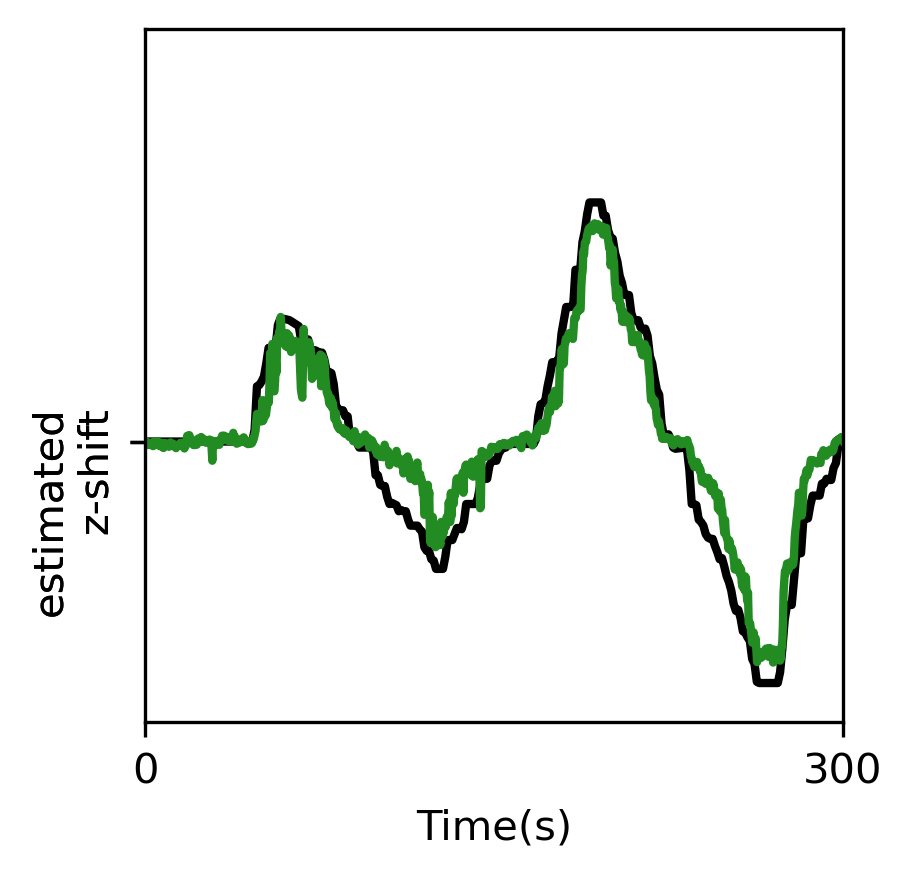

In [59]:
f,ax = plt.subplots(figsize=(3,3), dpi=300)
dy = 0

ax.plot(ground_truth[:,0], ground_truth[:,1] - ground_truth[0,1], color='k', lw=2)
ax.plot(ts, dy + zshift, color='forestgreen', lw=2)
ax.set_xticks([540, 840], [0, 300])
ax.set_xlim(540,840)
ax.set_yticks([0,dy], ['objective\nz-movement', 'estimated\nz-shift'], rotation=90)
ax.set_xlabel("Time(s)")
plt.savefig(fdir / "axial_shift-ramp-overlapping.svg", bbox_inches='tight',pad_inches=0)

In [66]:
(ground_truth[:250,1] - ground_truth[0,1]).max()

19.899999999999864

In [67]:
(ground_truth[:250,1] - ground_truth[0,1]).min()

-20.100000000000136

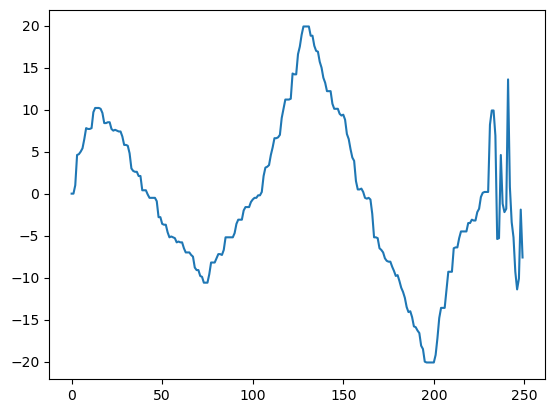

In [65]:
plt.plot(ground_truth[:250,1] - ground_truth[0,1])

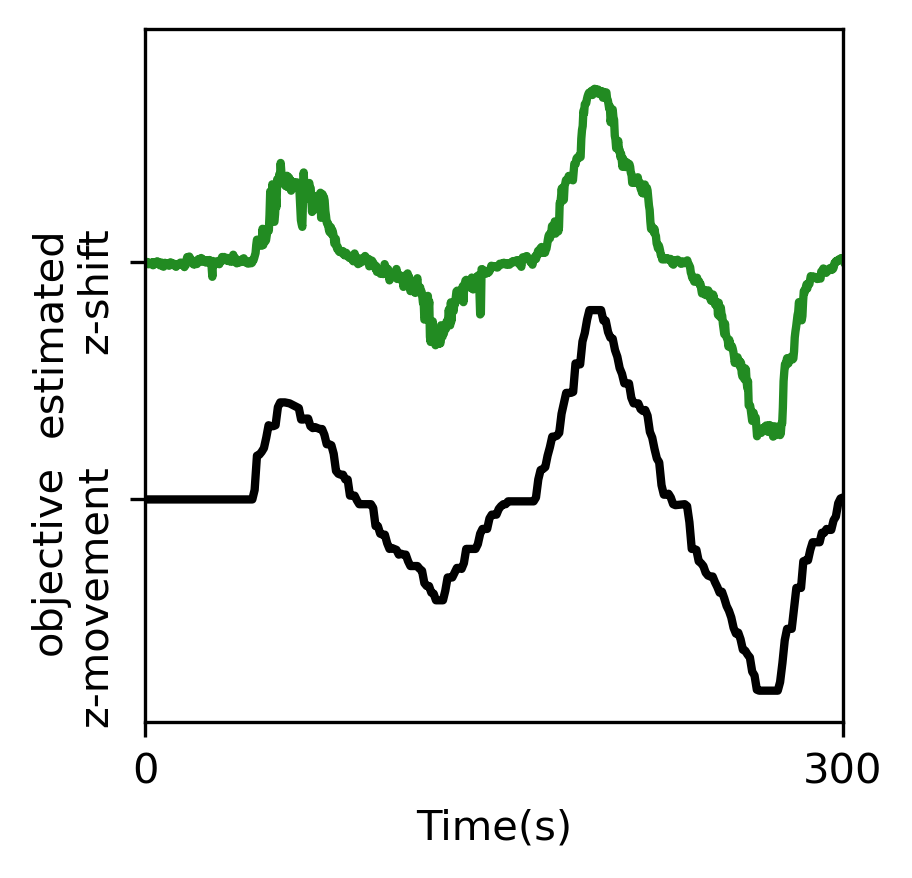

In [56]:
f,ax = plt.subplots(figsize=(3,3), dpi=300)
dy = 25

ax.plot(ground_truth[:,0], ground_truth[:,1] - ground_truth[0,1], color='k', lw=2)
ax.plot(ts, dy + zshift, color='forestgreen', lw=2)
ax.set_xticks([540, 840], [0, 300])
ax.set_xlim(540,840)
ax.set_yticks([0,dy], ['objective\nz-movement', 'estimated\nz-shift'], rotation=90)
ax.set_xlabel("Time(s)")
plt.savefig(fdir / "axial_shift-ramp.svg", bbox_inches='tight',pad_inches=0)

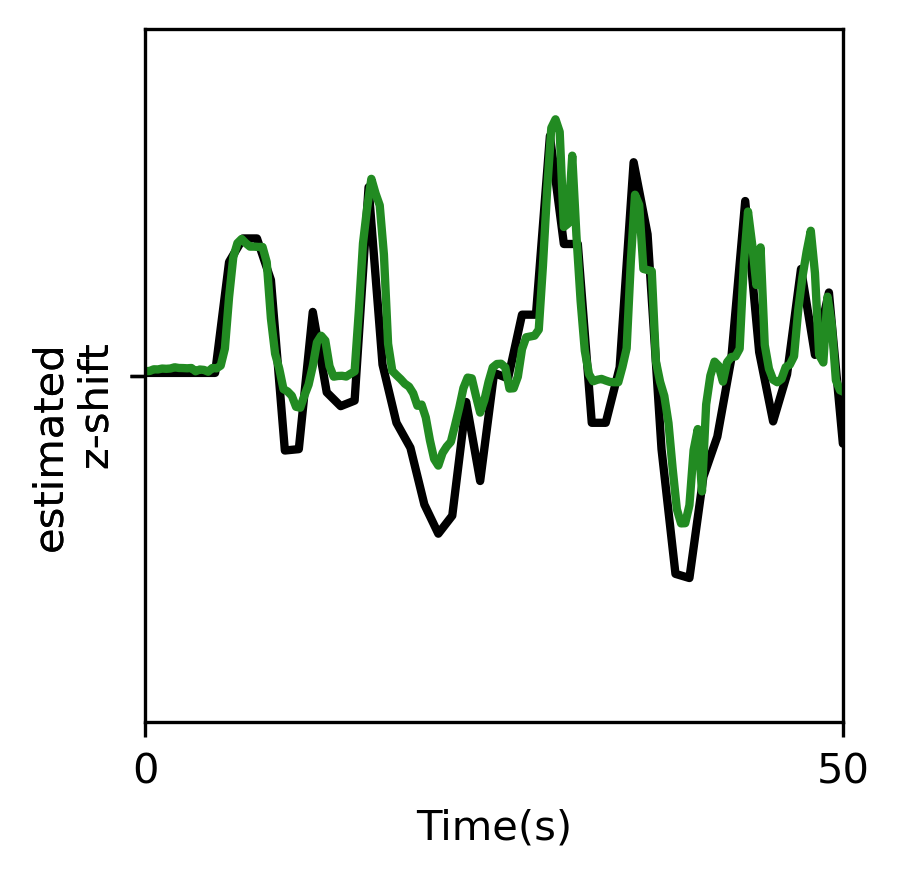

In [63]:
f,ax = plt.subplots(figsize=(3,3), dpi=300)
# dy = 25

ax.plot(ground_truth[:,0], ground_truth[:,1] - ground_truth[0,1], color='k', lw=2)
ax.plot(ts, dy + zshift, color='forestgreen', lw=2)
# ax.set_xticks([500, 800], [0, 300])
ax.set_xlim(930,980)
ax.set_xticks([930, 980], [0,50])
ax.set_yticks([0,dy], ['objective\nz-movement', 'estimated\nz-shift'], rotation=90)
ax.set_xlabel("Time(s)")
ax.set_ylim(-25,25)

plt.savefig(fdir / "axial_shift-fast-wiggles-overlapping.svg", bbox_inches='tight',pad_inches=0)

# ax.plot(zshift_ts + 5, (zshifts), color='forestgreen', lw=3)
# plt.plot(pixshift_ts,  dy + (20*float_shifts[:,0]), color='k', lw=2.5)
# ax.set_xlim(5,115)
# ax.set_xticks([0,100])
# ax.set_yticks([0, dy], ['objective\nz-movement', 'estimated\nz-shift'], rotation=90)
# ax.axis["left"].major_ticklabels.set_va("top")

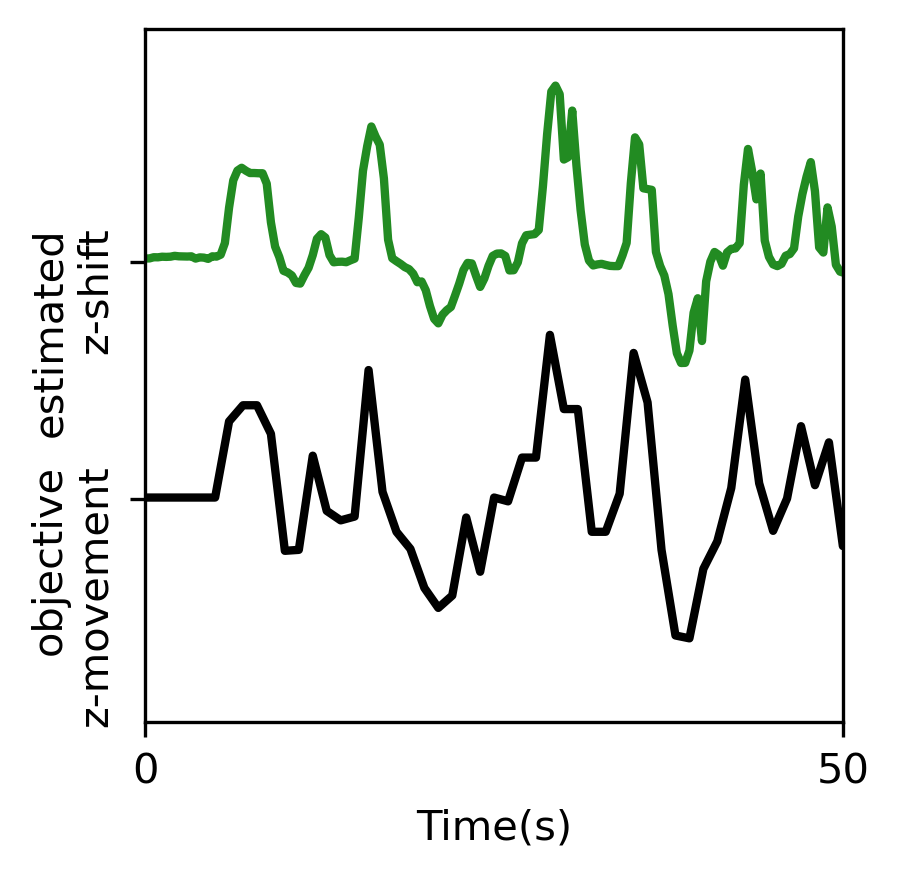

In [55]:
f,ax = plt.subplots(figsize=(3,3), dpi=300)
dy = 25

ax.plot(ground_truth[:,0], ground_truth[:,1] - ground_truth[0,1], color='k', lw=2)
ax.plot(ts, dy + zshift, color='forestgreen', lw=2)
# ax.set_xticks([500, 800], [0, 300])
ax.set_xlim(930,980)
ax.set_xticks([930, 980], [0,50])
ax.set_yticks([0,dy], ['objective\nz-movement', 'estimated\nz-shift'], rotation=90)
ax.set_xlabel("Time(s)")

plt.savefig(fdir / "axial_shift-fast-wiggles.svg", bbox_inches='tight',pad_inches=0)

# ax.plot(zshift_ts + 5, (zshifts), color='forestgreen', lw=3)
# plt.plot(pixshift_ts,  dy + (20*float_shifts[:,0]), color='k', lw=2.5)
# ax.set_xlim(5,115)
# ax.set_xticks([0,100])
# ax.set_yticks([0, dy], ['objective\nz-movement', 'estimated\nz-shift'], rotation=90)
# ax.axis["left"].major_ticklabels.set_va("top")

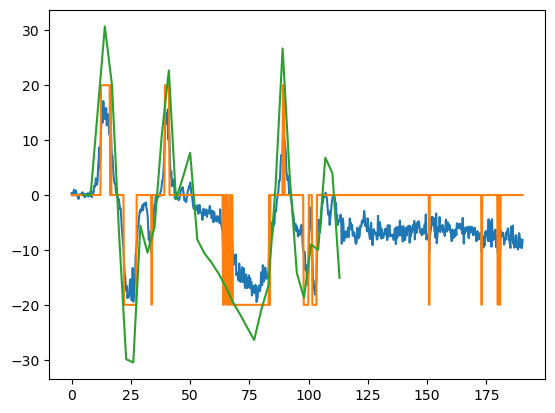

In [15]:
plt.plot(pixshift_ts,  20 * float_shifts[:,0])
plt.plot(pixshift_ts,  20 * int_shifts[:,0])

plt.plot(zshift_ts + 5, zshifts)

In [295]:
im1 = mx[10][40:60].mean(axis=0)

In [299]:
vol1 = mx[:,:30].mean(axis=1)

In [302]:
from suite3d import nbtools as nbui

In [303]:
nbui.ImageSliceViewer3D(ref_img)

interactive(children=(RadioButtons(description='Slice plane selection:', options=('x-y', 'y-z', 'z-x'), style=…

(<Figure size 1200x900 with 1 Axes>,
 <Axes: >,
 <matplotlib.image.AxesImage at 0x7f5757f1aa60>)

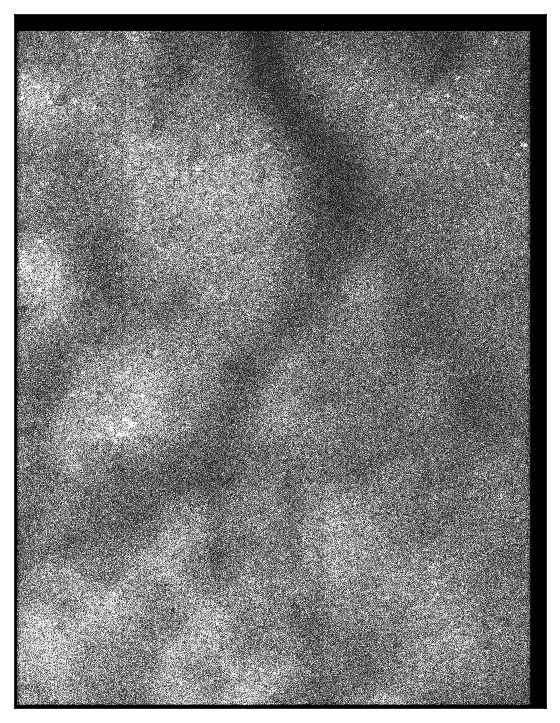

In [301]:
tfu.show_tif(im1)